<a href="https://colab.research.google.com/github/phiamorton/Stat-Mech-Project/blob/main/StatMechFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

import matplotlib.animation as animation

#2D Ising Model
The partition function for the Ising model
$$Z = \sum_{\{s_i = \pm 1\}} {\rm exp} \left\{K \sum_{\langle i j \rangle} s_i s_j  + h \sum_i s_i\right\}$$
**We will assume periodic boundary conditions and indices i,j indicate a 2D position.**



The Boltzmann weight is
$${\rm exp} \left\{K \sum_{\langle i j \rangle} s_i s_j  + h \sum_i s_i\right\}$$
where the input `spins` will be a lattice of -1 and +1's.

In [2]:
def BoltzmannWeight(spins, K, h):
    sum=0
    #assumes non periodic boundary conditions, should be fine to ignore in the large N limit
    for i in range(len(spins)): #assumes spins is NxN matrix
      for j in range(len(spins)):
        if i == (len(spins)-1):
          #sum+=((K*spins[len(spins)-1][j]*spins[0][j])) #periodic boundary conditions
          sum+=((h*spins[len(spins)-1][j]))
          #print(len(spins)-1,j, )
          #print(spins[len(spins)-1][j])
        if j == (len(spins)-1) and i != (len(spins)-1):
          #sum+=((K*spins[i][len(spins)-1]*spins[i][0])) #periodic boundary conditions
          sum+=((h*spins[i][len(spins)-1]))
          #print(spins[i][len(spins)-1])
        if i< len(spins)-1 and j<len(spins)-1:
          #print(i,j)
          sum+=((K*spins[i][j]*spins[i+1][j]))
          sum+=((K*spins[i][j]*spins[i][j+1]))
          #sum+=((K*spins[i][j]*spins[i-1][j]))
          #sum+=((K*spins[i][j]*spins[i][j-1]))
          sum+=((h*spins[i][j]))
          #print(sum)
    #print(sum)
    BW=np.exp(sum)
    return BW

#here I make N large enough that the boundaries do not matter so it is ok that the edges are not included in this weight
spins_test= np.ones([4,4])
#print(range(len((spins_test))))
#print(len(spins_test))
print(BoltzmannWeight(spins_test,1, 1))
#print('')

583461742527454.9


Here I will generate samples (lattices with up and down "spins"). I want multiple numbers of samples and can hopefully find a way to average them. Each sample is an nxn lattice wihtout periodic boundary conditions.


In [ ]:
def genSamples(num_samples, K, h):
    # number of sites in our 1D ising model
    N_lattice = 100
    samples = np.zeros((num_samples, N_lattice, N_lattice)) # where you will store your samples

    for i in range((num_samples)):
      if i==0:
        #creat the lattice at "time step 1"
        spin_start= np.ones([N_lattice, N_lattice])
        samples[0]= spin_start
      if i>0:
        #samples[i]=samples[i-1]
        spin_start= samples[i-1].copy()
        #print(i, samples[i-1]-samples[i-2])
      for n in range(N_lattice): #number of possible flips
        if n>0:
          spin_start= samples[i].copy()
        site= np.random.choice(N_lattice), np.random.choice(N_lattice)
        pos_flip=spin_start.copy()
        #print(pos_flip[site])
        pos_flip[site]=-1*spin_start.copy()[site]
        A= BoltzmannWeight(pos_flip, K, h)/BoltzmannWeight(spin_start, K, h)
        A=np.min([1,A])
        prob=np.random.rand(1,1)
        #print(prob)
        if prob <=A:
          #print(samples[i]-pos_flip)
          samples[i] = pos_flip
          #print(A, 'flip')
      # store the choice in samples
        else:
          samples[i] =spin_start
          #print(A, prob, 'no flip')

    return samples

test= genSamples(3,1,1)


<ipython-input-3-1dc1fe29303f>:24: RuntimeWarning: overflow encountered in exp
  BW=np.exp(sum)
<ipython-input-4-041b58d4962f>:22: RuntimeWarning: invalid value encountered in scalar divide
  A= BoltzmannWeight(pos_flip, K, h)/BoltzmannWeight(spin_start, K, h)


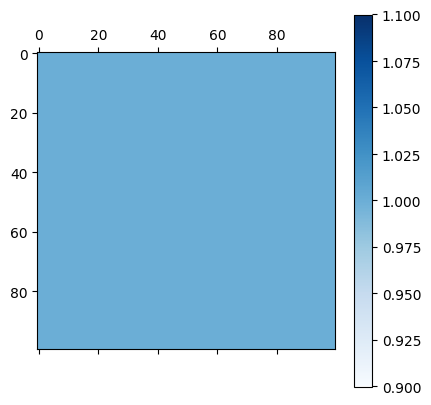

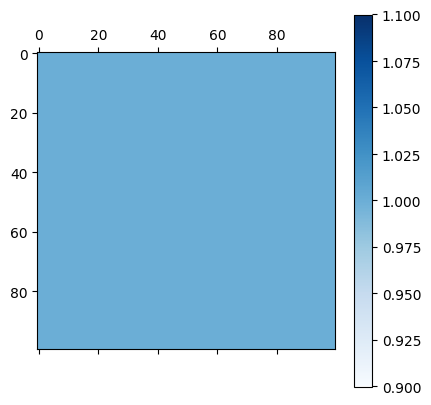

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:

plt.matshow((test[0]), cmap=plt.cm.Blues)
plt.colorbar()  # Add a colorbar to interpret the values
plt.show()
plt.matshow((test[1]), cmap=plt.cm.Blues)
plt.colorbar()
plt.show()
print(test[0]-test[1])
print(test[1]-test[2])

In [ ]:
def genSamples_hits(num_samples, K, h, T):
    # number of sites in our 1D ising model
    N_lattice = 10
    samples = np.zeros([num_samples, N_lattice, N_lattice]) # where you will store your samples

    for i in range((num_samples)):
      if i==0:
        #creat the lattice at "time step 1"
        spin_start= np.ones([N_lattice, N_lattice])
        samples[0]= spin_start
      if i>0:
        #samples[i]=samples[i-1]
        spin_start= samples[i-1].copy()
        #print(i, samples[i-1]-samples[i-2])
      if i==1: #put the particle hit at time step 1
        #samples[i]=spin_start
        spin_start= samples[i-1].copy()
        #print(i, samples[i-1]-samples[i-2])
        hit_sitex=int(N_lattice/2)
        hit_sitey=int(N_lattice/2)
        #print(hit_sitex, hit_sitey)
        spin_start[hit_sitex, hit_sitey]= -2
        #print(spin_start)
        # spin_start[hit_sitex-1, hit_sitey]= -1
        # spin_start[hit_sitex, hit_sitey-1]= -1
        # spin_start[hit_sitex-1, hit_sitey-1]= -1
        #-1 because the bias h is positive (ground state =1)

        nearest_neightbors= [[hit_sitex+1, hit_sitey],[hit_sitex, hit_sitey+1],[hit_sitex-1, hit_sitey],[hit_sitex, hit_sitey-1]]
        pos_flip_nn=spin_start.copy()
        for j in range(len(nearest_neightbors)):
          #print(nearest_neightbors[j])
          #spin_start= samples[i-1].copy()
          pos_flip_nn[nearest_neightbors[j]]=-1*spin_start.copy()[nearest_neightbors[j]]
          A= BoltzmannWeight(pos_flip_nn, K, h)/BoltzmannWeight(spin_start, K, h)
          A=np.min([1,A])
          prob_prop =np.random.rand(1,1)
          if prob_prop <=A:
          #print(samples[i]-pos_flip)
            spin_start = pos_flip_nn
            #print(A, nearest_neightbors[j], 'flip')
      for n in range(N_lattice**2): #number of possible flips
        if n>0:
          spin_start= samples[i].copy()
        site= np.random.choice(N_lattice), np.random.choice(N_lattice)
        if i==1 and site== [hit_sitex, hit_sitey]:
          site= np.random.choice(N_lattice), np.random.choice(N_lattice)
        #define the flipped spin_start
        pos_flip=spin_start.copy()
        #print(pos_flip[site])
        pos_flip[site]=-1*spin_start.copy()[site]

        #determine probability of flip - random num gen >A dont flip, random num gen < A, flip
        A= BoltzmannWeight(pos_flip, K, h)/BoltzmannWeight(spin_start, K, h)
        A=np.min([1,A])
        prob =np.random.rand(1,1)
        noise_prob=0.01/T #noise increases as temperature increases

        if prob <=A:
          #print(samples[i]-pos_flip)
          samples[i] = pos_flip
          #print(A, site, 'flip')
        if prob<=noise_prob and prob>A: #there is a nonzero chance of a flip even if it is not energetically favorable
          #print(samples[i]-pos_flip)
          samples[i] = pos_flip
          print('noise')
      # store the choice in samples
        else:
          samples[i] =spin_start
          #print(A, prob, 'no flip')

    return samples

# n_samp=10
# test= genSamples_hits(n_samp,1,1,1)
# #print(test)
# for i in range(n_samp):
#   plt.matshow((test[i]), cmap=plt.cm.Blues)
#   plt.colorbar()  # Add a colorbar to interpret the values
#   plt.show()

#print(test[0][0]-test[0][1])
#print(test[0][1]-test[0][2])



In [ ]:
print(len(test))

2


In [ ]:
#now to try adding in K as a matrix, denoting bond strength, (different atoms are more or less easy to ionize)
#more stable electron configurations (such as nobles) will be harder to ionize
#larger atoms have their elctrons more loosely bound and are easier to ionize too

def BoltzmannWeight_dopants(spins, K, h, T, dop_spacing):
    sum=0

    K_dop_val=2*K/T
    K_reg_val=1*K/T
    #assumes non periodic boundary conditions, should be fine to ignore in the large N limit
    for i in range(len(spins)): #assumes spins is NxN matrix
      for j in range(len(spins)):
        if i == (len(spins)-1):
          #sum+=((K*spins[len(spins)-1][j]*spins[0][j])) #periodic boundary conditions
          sum+=((h*spins[len(spins)-1][j]))
          #print(len(spins)-1,j, )
          #print(spins[len(spins)-1][j])
        if j == (len(spins)-1) and i != (len(spins)-1):
          #sum+=((K*spins[i][len(spins)-1]*spins[i][0])) #periodic boundary conditions
          sum+=((h*spins[i][len(spins)-1]))
          #print(spins[i][len(spins)-1])
        if i< len(spins)-1 and j<len(spins)-1:
          #print(i,j)
          if i % dop_spacing ==0 and j % dop_spacing ==0 and i !=0 and j != 0:
            K=K_dop_val
            sum+=((K*spins[i][j]*spins[i+1][j]))
            sum+=((K*spins[i][j]*spins[i][j+1]))
          if i+1 % dop_spacing ==0 and j % dop_spacing ==0 and i !=0 and j != 0:
            K=K_dop_val
            sum+=((K*spins[i][j]*spins[i+1][j]))
            sum+=((K_reg_val*spins[i][j]*spins[i][j+1]))
          if i % dop_spacing ==0 and j+1 % dop_spacing ==0 and i !=0 and j != 0:
            K=K_dop_val
            sum+=((K_reg_val*spins[i][j]*spins[i+1][j]))
            sum+=((K*spins[i][j]*spins[i][j+1]))
          else:
            K=K_reg_val
            sum+=((K*spins[i][j]*spins[i+1][j]))
            sum+=((K*spins[i][j]*spins[i][j+1]))
            #sum+=((K*spins[i][j]*spins[i-1][j]))
            #sum+=((K*spins[i][j]*spins[i][j-1]))
            sum+=((h*spins[i][j]))
            #print(sum)
    #print(sum)
    BW=(sum)
    return BW

#here I make N large enough that the boundaries do not matter so it is ok that the edges are not included in this weight
#spins_test= np.ones([4,4])
#print(range(len((spins_test))))
#print(len(spins_test))
#print('')

# K=np.ones([N_lattice, N_lattice]) #start with ones
# #add in dopants every n spacings
# n=4
# for i in range(N_lattice):
#   for j in range(N_lattice):
#     if i % 4 ==0 and j %4 ==0 and i !=0 and j != 0:
#       K[i][j]=2
#       K[i+1][j]=2
#       K[i][j+1]=2
#       K[i+1][j+1]=2
# print(K)


#print(BoltzmannWeight(spins_test,1, 1), BoltzmannWeight_dopants(spins_test, K, 1))
#



In [3]:
def BoltzmannWeight_local(spins, sitex, sitey, K, h, T, dop_spacing):
  sum=0

  K_dop_val=2*K/T
  K_reg_val=1*K/T
    #assumes non periodic boundary conditions, should be fine to ignore in the large N limit
  if sitex % dop_spacing ==0 and sitey % dop_spacing ==0:
    K=K_dop_val
  else:
    K=K_reg_val
  if sitex == (len(spins)-1)  and sitey != len(spins)-1  and sitey !=0:
    #sum+=((K*spins[sitex][sitey]*spins[sitex+1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex-1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey+1]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey-1]))
  if sitey == len(spins)-1  and sitex != len(spins)-1 and sitex !=0:
    sum+=((K*spins[sitex][sitey]*spins[sitex+1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex-1][sitey]))
    #sum+=((K*spins[sitex][sitey]*spins[sitex][sitey+1]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey-1]))
  if sitex ==0  and sitey != len(spins)-1 and sitey !=0:
    sum+=((K*spins[sitex][sitey]*spins[sitex+1][sitey]))
    #sum+=((K*spins[sitex][sitey]*spins[sitex-1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey+1]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey-1]))
  if sitey==0 and sitex != len(spins)-1 and sitex !=0:
    sum+=((K*spins[sitex][sitey]*spins[sitex+1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex-1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey+1]))
    #sum+=((K*spins[sitex][sitey]*spins[sitex][sitey-1]))
  if sitex != len(spins)-1 and sitey != len(spins)-1 and sitex !=0 and sitey !=0:
    sum+=((K*spins[sitex][sitey]*spins[sitex+1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex-1][sitey]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey+1]))
    sum+=((K*spins[sitex][sitey]*spins[sitex][sitey-1]))

  sum+=((h*spins[sitex][sitey]))
            #print(sum)
    #print(sum)
  BW=np.exp(sum)
  return BW


In [ ]:
#BoltzmannWeight_dopants(spins_test, K, 1,100000000, 4)

In [ ]:
# temp=np.linspace(1,2,100)

# for _ in range(len(temp)):
#   plt.scatter(temp[_], BoltzmannWeight_dopants(spins_test, K, 1,temp[_]), color= 'blue')

# plt.xlabel('temperature [a.u.]')
# plt.ylabel('Boltzmann weight')
# plt.show()



In [4]:
def genSamples_hits_dopants(N_lattice, num_samples, K, h, T, dop_spacing):
    # number of sites in our 1D ising model
    #N_lattice = 12
    samples = np.zeros([num_samples, N_lattice, N_lattice]) # where you will store your samples

    for i in range((num_samples)):
      if i==0:
        #creat the lattice at "time step 1"
        spin_start= np.ones([N_lattice, N_lattice])
        #pos_flip=np.zeros([N_lattice, N_lattice])
        #spin_start= np.random.choice([-1,1], [N_lattice, N_lattice]) #starting arbitrary set of spins
        #spin_start= np.zeros([N_lattice, N_lattice])
      #pick random site
        samples[0]= spin_start
      if i>0:
        #samples[i]=samples[i-1]
        spin_start= samples[i-1].copy()
        #print(i, samples[i-1]-samples[i-2])
      if i==1: #put the particle hit at time step 1
        #samples[i]=spin_start
        spin_start= samples[i-1].copy()
        #print(i, samples[i-1]-samples[i-2])
        hit_sitex=int(N_lattice/2)
        hit_sitey=int(N_lattice/2)
        #print(hit_sitex, hit_sitey)
        spin_start[hit_sitex, hit_sitey]= -2
        samples[i]=spin_start
      # if i>=1:
      #   nearest_neightbors= [[hit_sitex+1, hit_sitey],[hit_sitex, hit_sitey+1],[hit_sitex-1, hit_sitey],[hit_sitex, hit_sitey-1]]
      #   pos_flip_nn=spin_start.copy()
      #   for j in range(len(nearest_neightbors)):
      #     #print('nearest', nearest_neightbors[j])
      #     #spin_start= samples[i-1].copy()
      #     pos_flip_nn[nearest_neightbors[j]]=-1*spin_start.copy()[nearest_neightbors[j]]
      #     A= BoltzmannWeight_local(pos_flip_nn, nearest_neightbors[j][0], nearest_neightbors[j][1], K, h, T, dop_spacing)/BoltzmannWeight_local(spin_start, nearest_neightbors[j][0], nearest_neightbors[j][1], K, h, T, dop_spacing)
      #     A=np.min([1,A])
      #     prob_prop =np.random.rand(1,1)
      #     if prob_prop <=A:
      #     #print(samples[i]-pos_flip)
      #       samples[i] = pos_flip_nn.copy()
      #       print('flip', i)
      #     else:
      #       samples[i]=spin_start.copy()
      #       print('no flip', i)

      for n in range(N_lattice): #number of possible flips
        #spin_start= samples[i]

        site= np.random.choice(N_lattice), np.random.choice(N_lattice)
        if i==1 and site== (hit_sitex, hit_sitey):
          site= np.random.choice(N_lattice), np.random.choice(N_lattice)
        #print(i, spin_start[site])
        #define the flipped spin_start
        pos_flip=spin_start.copy()
        #print(pos_flip[site])
        if pos_flip[site]==1:
          pos_flip[site]=-1
        else:
          pos_flip[site]=1
        #pos_flip[site]=-1*spin_start.copy()[site]

        #determine probability of flip - random num gen >A dont flip, random num gen < A, flip
        A= BoltzmannWeight_local(pos_flip, site[0], site[1], K, h, T, dop_spacing)/BoltzmannWeight_local(spin_start, site[0], site[1], K, h, T, dop_spacing)
        A=np.min([1,A])
        #print(A, BoltzmannWeight_dopants(pos_flip, K, h, T, dop_spacing), BoltzmannWeight_dopants(spin_start, K, h, T, dop_spacing))
        #print(n, A)
        prob =np.random.rand(1,1)
        noise_prob=0.01*T #noise increases as temperature increases

        #print(prob, noise_prob, A
        #print(prob, noise_prob, A)
        #print(prob)
        if prob <=A:
          #print(samples[i]-pos_flip)
          #print(pos_flip[site]-spin_start[site])
          spin_start = pos_flip
          #print(i, n, A, site, 'flip')
          #print(pos_flip-spin_start)
          #print(pos_flip[site]-spin_start[site])
          #print(BoltzmannWeight_local(pos_flip, site[0], site[1], K, h, T, dop_spacing), BoltzmannWeight_local(spin_start, site[0], site[1], K, h, T, dop_spacing))

        if prob<=noise_prob and prob>A: #there is a nonzero chance of a flip even if it is not energetically favorable
          #print(samples[i]-pos_flip)
          spin_start = pos_flip
          #print(A, 'noise')
      # store the choice in samples
        else:
          spin_start =spin_start
          #print(A, prob, 'no flip')
      samples[i]=spin_start
    return samples

In [5]:
#temp=np.linspace(1,1.5,10)
N_lattice = 30

n_samp=50
K=1

test_dop_hits= genSamples_hits_dopants(N_lattice,n_samp, K, 1, 1, 5)

#print(len(test_dop_hits))

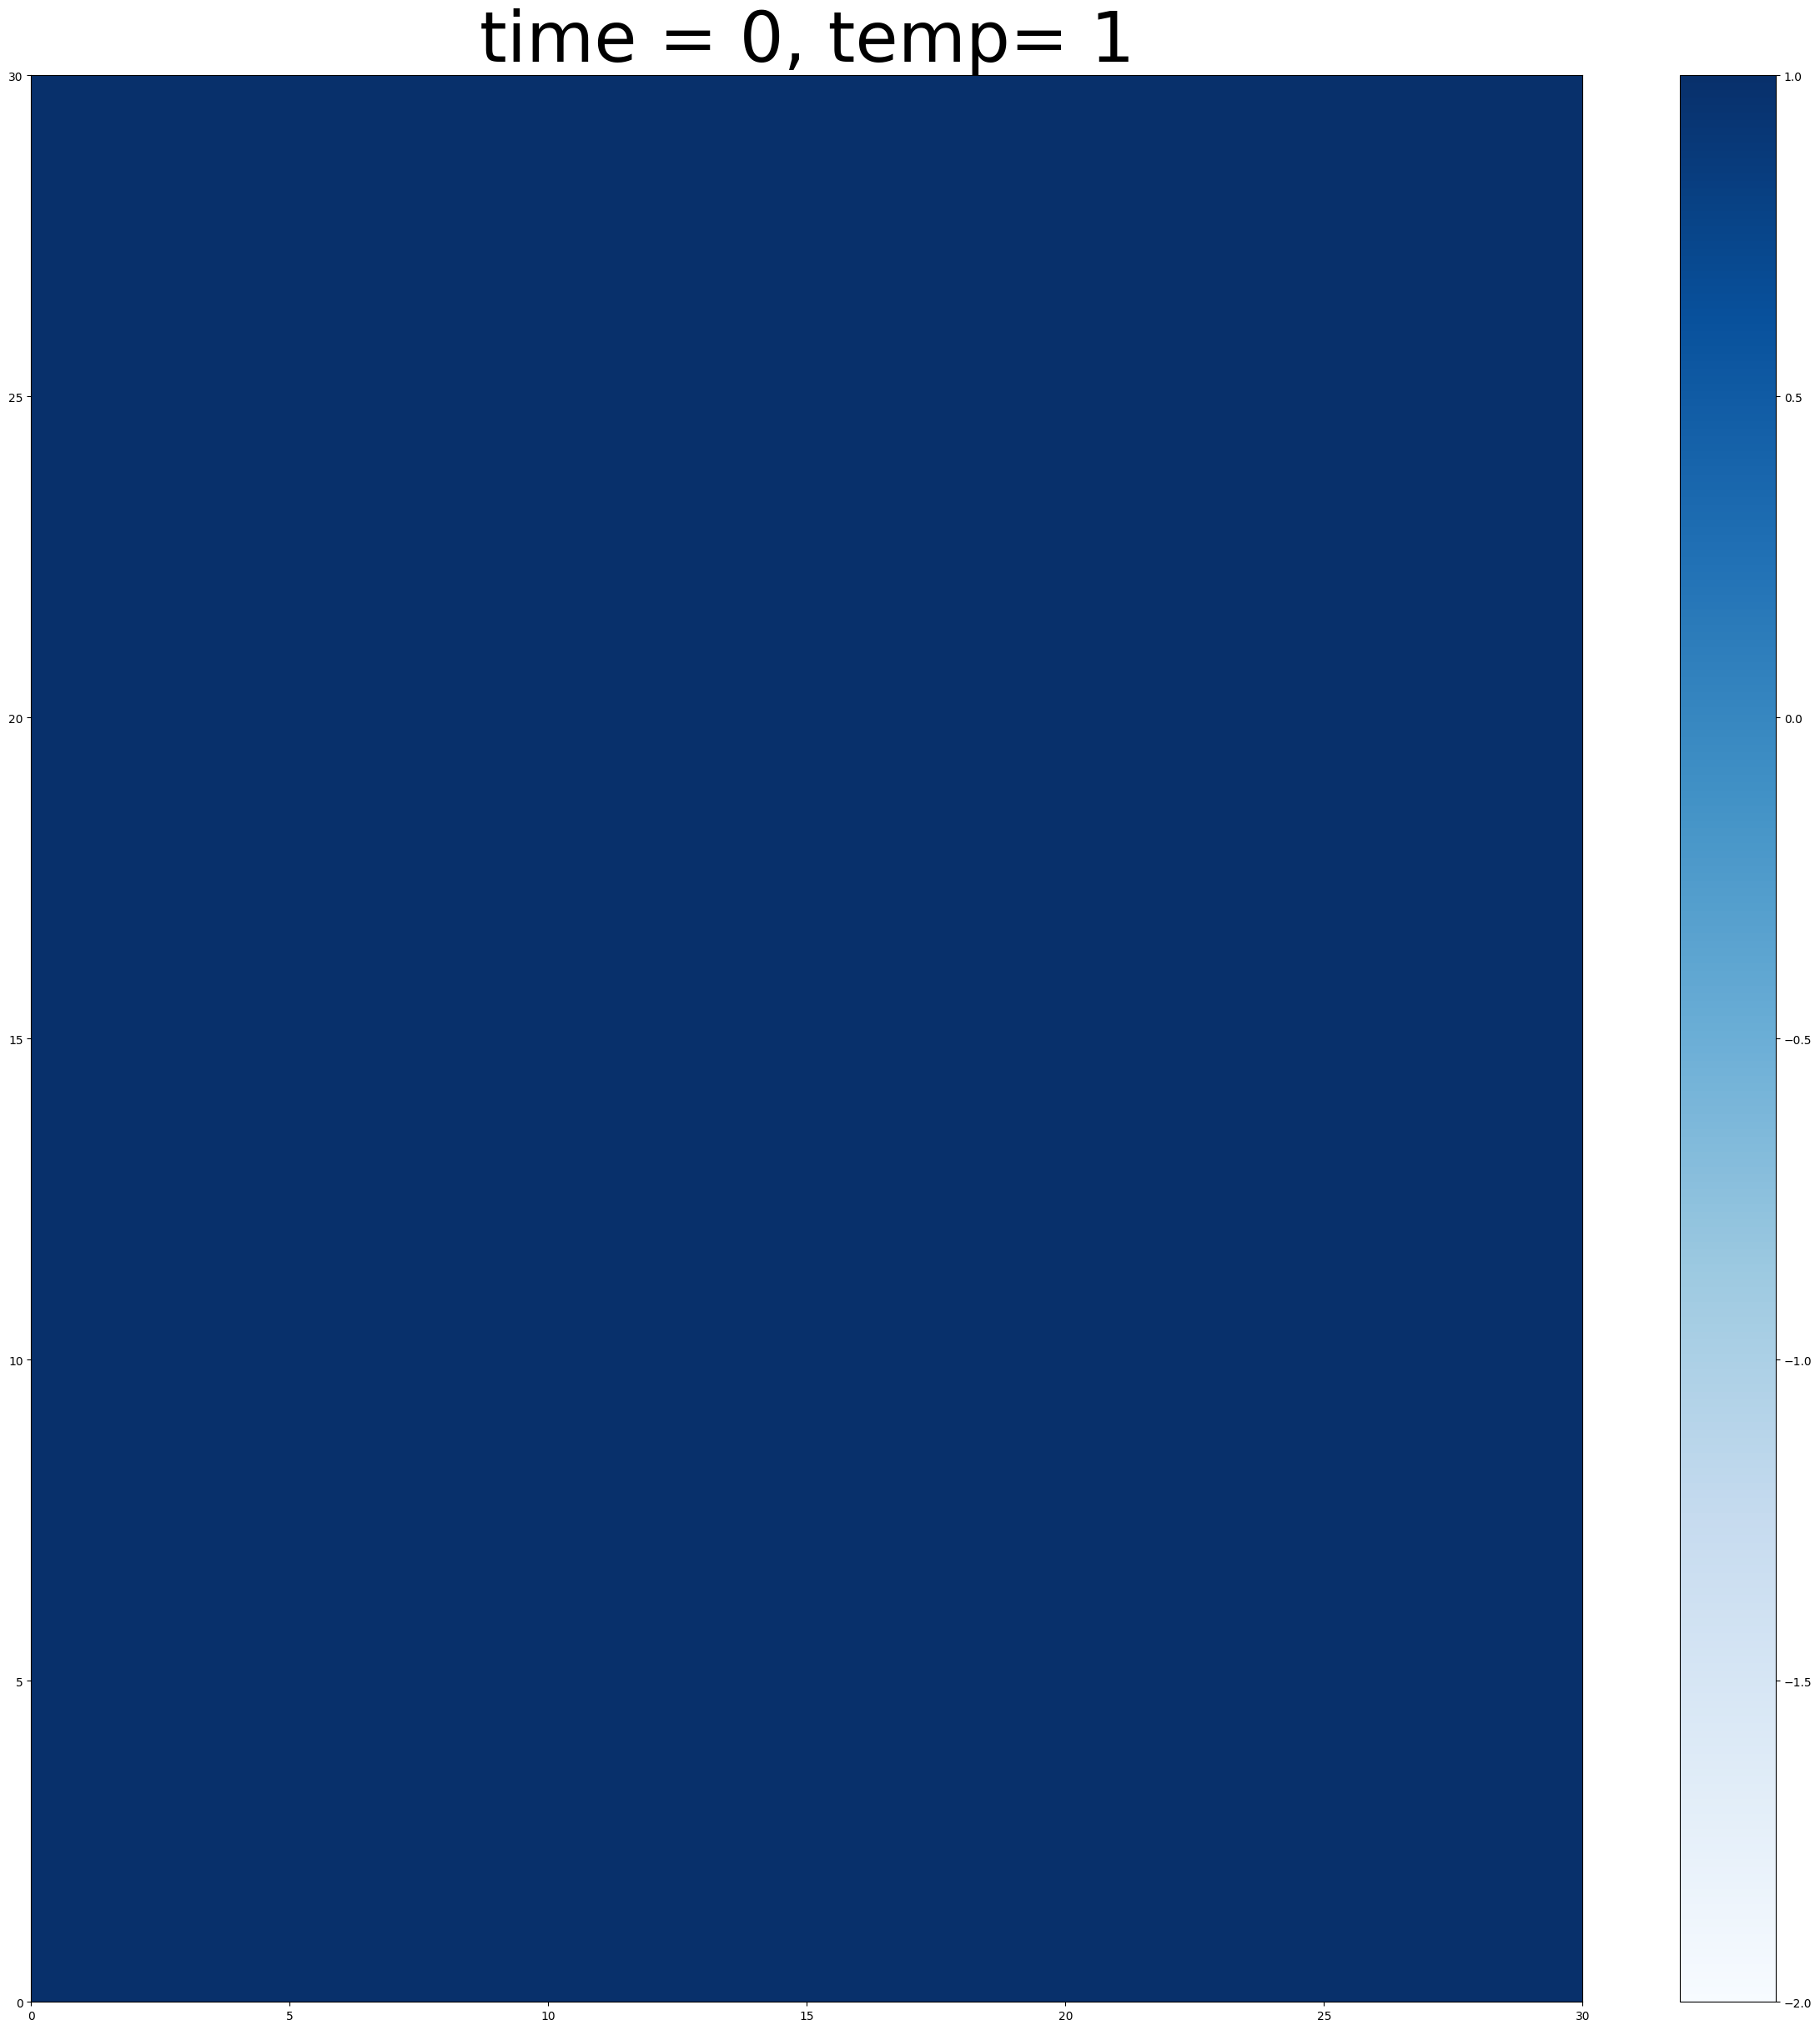

In [26]:
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots(figsize=(N_lattice, N_lattice))
ax.set(xlim=(0,N_lattice ), ylim=(0, N_lattice))

cax = ax.pcolormesh(test_dop_hits[0],vmin=-2, vmax=1, cmap=plt.cm.Blues)
fig.colorbar(cax)
#plt.show()


def animate(i):
     cax.set_array(test_dop_hits[i].flatten())
     #print(i)
     #ax.text(0.05, 0.95, f'Time step: {i}', transform=ax.transAxes, va='top')
     #plt.suptitle(i)
     #cbar.set_title(f'Frame {i}')
     #ax.clear()
     ax.set_title(f"time = {i}, temp= 1", fontsize=60)
     #ttl = ax.text(0.5, 1.005, i, transform = ax.transAxes, va='center', fontsize= 'medium')
     return cax


anim = FuncAnimation(fig, animate, interval=400, frames=(n_samp))

#plt.show()
#anim.save('test.mp4')
#anim.save('test.gif', writer='imagemagick')
anim.save('Ising_model_detector.gif', writer = "pillow", fps=5 )

In [ ]:
# for i in range(n_samp):
#   plt.matshow((test_dop_hits[i]), cmap=plt.cm.Blues)
#   plt.colorbar()  # Add a colorbar to interpret the values
#   plt.show()

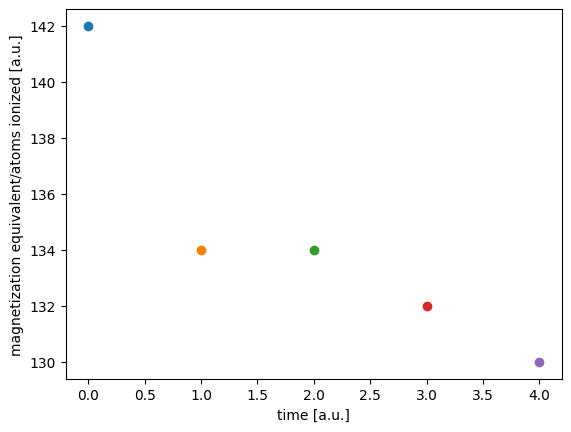

In [ ]:
def magnetization(spins):
    #magnetization is the average spin, so here we can simply sum over all spins to see if it is + or -
    mag= np.sum(spins)
    return mag
    return -1

magnetization(test[0])

for i in range(len(test)):
  plt.scatter(i, magnetization(test[i]))

plt.xlabel('time [a.u.]')
plt.ylabel('magnetization equivalent/atoms ionized [a.u.]')
plt.show()


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


In [ ]:
#spin spin correlation

In [ ]:
#add in impurities and set the ground state closer to neutral
#run random flips in parallel with a hit on the detecotor, which causes nearby flips